In [33]:
'''Adaptation Leaky Integrate and Fire Neuron Model'''

'Adaptation Leaky Integrate and Fire Neuron Model'

In [74]:
import numpy as np
from matplotlib.pyplot import *
from statistics import mode
import math

In [75]:
class Current:
    def __init__(self, i=4, c=4):
        self.i = i
        self.c = c
        
    def i_interval(self, time, interval = [30, 90]):
        start, end = interval
        if start < time and time < end:
            return self.i
        return 0
    
    def i_angle(self, time):
        if self.c % 2 == 0:
            return self.c * math.sin(time)
        else :
            return self.c * math.cos(time)
        
    def i_linear(self, time):
        return self.c * time
    
    def i_constant(self, time):
        return self.c
    
    def i_step(self, time, interval1=[0, 40], interval2=[50, 90]):
        start1, end1 = interval1
        start2, end2 = interval2
        if start1 < time < end1 or start2 < time < end2:
            return self.i
        return 0

In [99]:
class ALIF:
    current = Current()
    def __init__(self, time_interval=100, dt=0.1, i_func=current.i_interval, u_rest=0, R=1, C=1,threshold=1, const_w=1, a=1, b=1):
        self.time_interval = time_interval
        self.dt = dt
        self.i_func = i_func
        self.u_rest = u_rest
        self.R = R
        self.C = C
        self.threshold = threshold
        self.u = []
        self.i_init = []
        self.timer = []
        self.const_w = const_w
        self.a = a
        self.b = b
        self.is_spiked = False
        
    def start(self):
        self.timer = np.arange(0, self.time_interval + self.dt, self.dt)
        u = [self.u_rest for i in range(len(self.timer))]
        self.i_init = [self.i_func(j) for j in self.timer]
        w = [0 for _ in range(len(self.timer))]
        const = self.R * self.C
        for t in range(len(self.timer)):
            self.is_spiked = False
            u[t] = u[t-1] + (-(u[t-1] - self.u_rest) + self.R * self.i_init[t] - self.R * w[t-1]) * (self.dt/const)
            if u[t] >= self.threshold :
                u[t] = self.u_rest
                self.is_spiked = True
            if self.is_spiked:
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1] + self.b * self.const_w * 1) * (self.dt/self.const_w)
            else :
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1]) * (self.dt/self.const_w)
        self.u = u
        
    def time_period(self, i_const=0):
        time_periods = []
        const = self.R * self.C
        u = [self.u_rest for i in range(len(self.timer))]
        w = [0 for _ in range(len(self.timer))]
        curr = Current(c=i_const)
        i_const = curr.i_constant(self.time_interval)
        prev_period = 0
        for t in range(len(self.timer)):
            self.is_spiked = False
            u[t] = u[t-1] + (-(u[t-1] - self.u_rest) + self.R * i_const - self.R * w[t-1]) * (self.dt/const)
            if u[t] >= self.threshold:
                u[t] = self.u_rest
                time_periods.append(self.timer[t] - prev_period)
                prev_period = self.timer[t] 
                self.is_spiked = True
            if self.is_spiked:
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1] + self.b * self.const_w * 1) * (self.dt/self.const_w)
            else :
                w[t] = w[t-1] + (self.a * (u[t-1] - self.u_rest) - w[t-1]) * (self.dt/self.const_w)
        return mode(time_periods) 

In [100]:
class Plot:
    def __init__(self, alif):
        self.alif = alif
        
    def plot_ut(self):
        fig = figure(num=None, figsize=(20, 10))
        subplot(221)
        plot(alif.timer, alif.u)
        xlabel('Time')
        ylabel('U')
        title('U - time')
        grid(True)
        
    def plot_it(self):
        fig = figure(num=None, figsize=(20, 10))
        subplot(221)
        plot(alif.timer, alif.i_init)
        xlabel('Time')
        ylabel('I')
        title('I - time')
        grid(True)
        
    def plot_fi(self):
        fig = figure(num=None, figsize=(20, 10)) 
        i_x = np.arange(0, max(alif.i_init), alif.dt)
        i_y = [0 for _ in range(len(i_x))]

        for j in range(len(i_x)):
            try:
                i_y[j] = 1 / (alif.time_period(i_const=i_x[j]))
            except:
                i_y[j] = 0           
        subplot(221)
        plot(i_x, i_y)
        xlabel('I')
        ylabel('F')
        title('F - I')
        grid(True) 
        
    def plot_figs(self):
        self.plot_ut()
        self.plot_it()
        self.plot_fi()

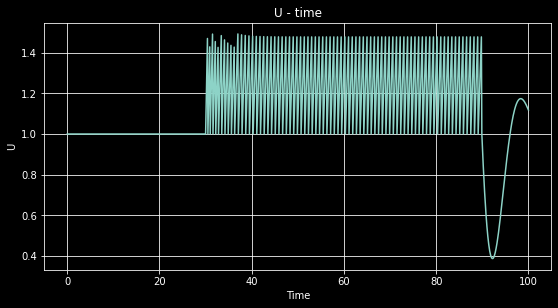

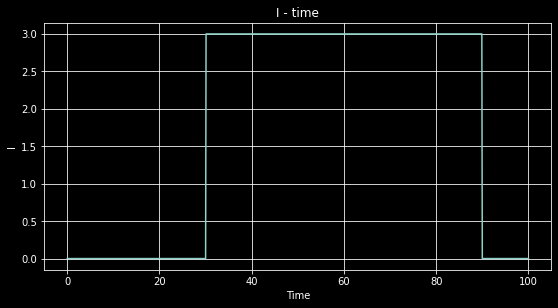

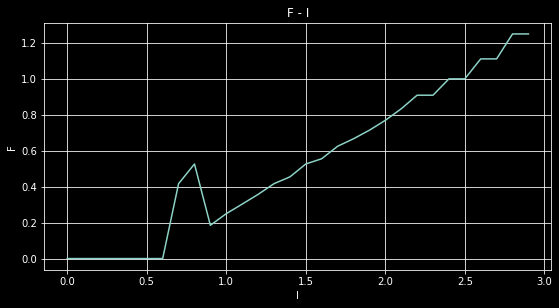

In [101]:
matplotlib.pyplot.style.use(['dark_background'])
current = Current(i=3)
alif = ALIF(i_func=current.i_interval, u_rest=1, R=4, C=2.5, threshold=1.5, const_w=3, a=2, b=2)
alif.start()
plt = Plot(alif)
plt.plot_figs()

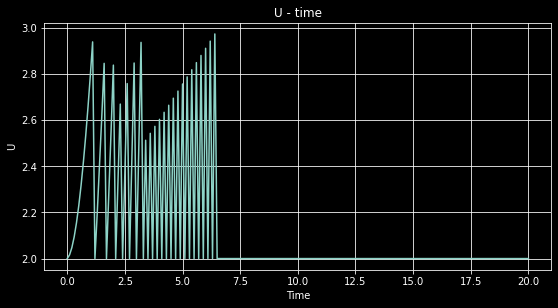

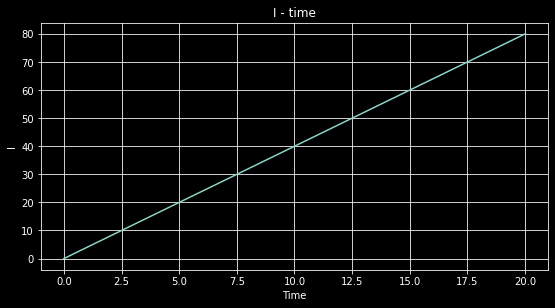

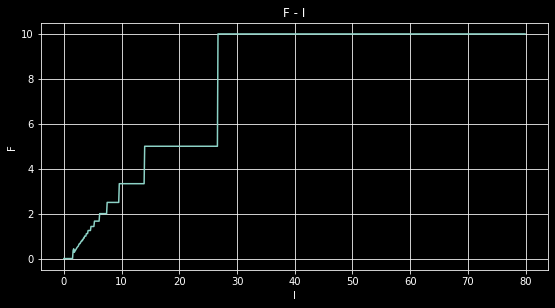

In [102]:
current = Current(i=7)
alif = ALIF(time_interval=20, i_func=current.i_linear, u_rest=2, R=1.25, C=2.5, threshold=3, const_w=2, a=1, b=1)
alif.start()
plt = Plot(alif)
plt.plot_figs()

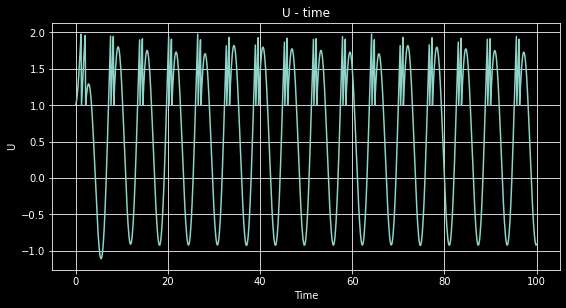

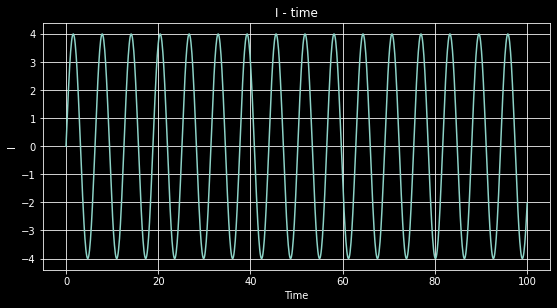

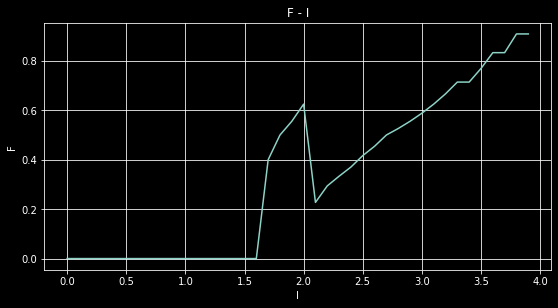

In [103]:
current = Current(i=2, c=4)
alif = ALIF(i_func=current.i_angle, u_rest=1, R=2, C=2.5, threshold=2, const_w=2, a=2, b=2)
alif.start()
plt = Plot(alif)
plt.plot_figs()

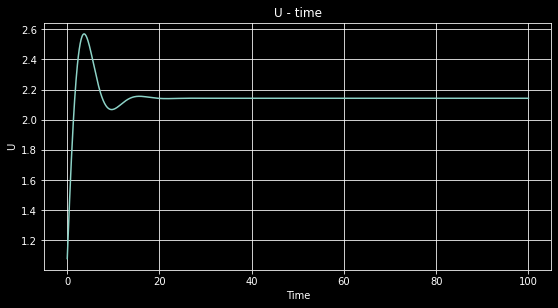

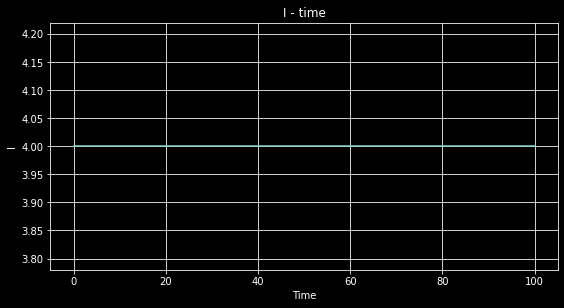

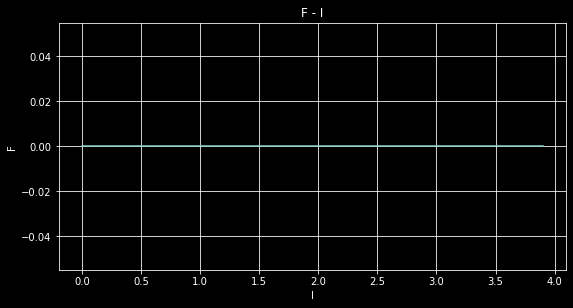

In [104]:
current = Current(i=2)
alif = ALIF(i_func=current.i_constant, u_rest=1, R=2, C=5, threshold=4, const_w=2, a=3, b=1)
alif.start()
plt = Plot(alif)
plt.plot_figs()

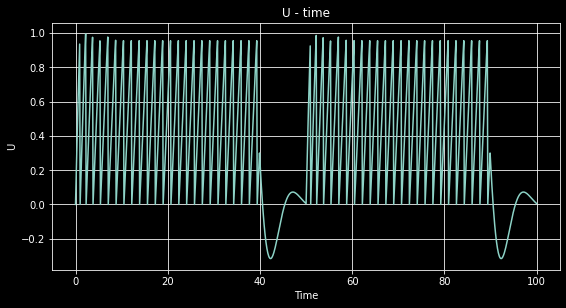

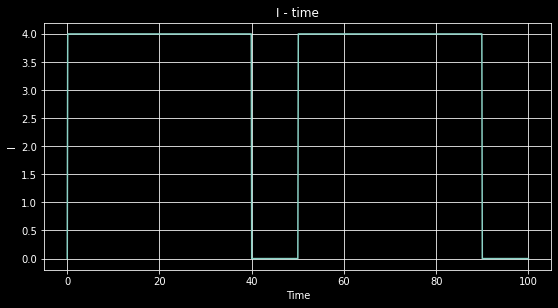

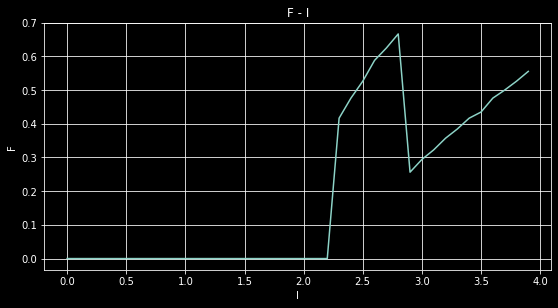

In [105]:
current = Current(i=4)
alif = ALIF(i_func=current.i_step, u_rest=0, R=2, C=3.5, threshold=1, const_w=2, a=3, b=2)
alif.start()
plt = Plot(alif)
plt.plot_figs()